In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

plt.style.use('ggplot')
plt.style.use('seaborn-bright')

In [4]:
# Handle null values
# Drop unnecessary cols
# Pivot by monthYear
# Usage rating Call Count/Duration - bucketizing/ add rating cols
# location grouping/bucketizing (consider 4 location cols)
# User profile dim table
# visualize and analyze data

In [3]:
voice_usage = pd.read_excel("data/1.4 IDD Outgoing.xlsx")
voice_usage

,event_source.hash,call_count,call_duration,country,ym
0,67051a84a611e81c3a2bca88a03f8c94,NaN,NaN,NaN,NaN
1,a78124cb1a595ac8ac06a288f1776392,NaN,NaN,NaN,NaN
2,2fa62285c8cac4a9a7952f5cf4556f21,NaN,NaN,NaN,NaN
3,ba778e08080d6c11ab448b779809fd39,1.0,84.0,United Arab Emirates,202105.0
4,6089d9300eca5a9f3766d3d0da8d7734,NaN,NaN,NaN,NaN
...,...,...,...,...,...
95589,bf1e15032ac3b50d9acb7f3fc1c7b1d7,2.0,61.0,Australia,202105.0
95590,bd9f297c38d8c326df5adebdd5705089,NaN,NaN,NaN,NaN
95591,b54c7f9917e1ce4296c7aadfce5b2cf8,NaN,NaN,NaN,NaN
95592,2a4af0907a8fd3a8b89d459ff17cb9fc,NaN,NaN,NaN,NaN


In [4]:
voice_usage = voice_usage.dropna(subset = ["call_count","call_duration","ym","country"])

In [5]:
voice_usage.rename(columns={'call_duration': 'duration','ym':'year-month','country':'outgoing_country'}, inplace=True)
voice_usage.reset_index(inplace=True)
voice_usage.drop("index",axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
voice_usage.isnull().sum(axis=0)

event_source.hash    0
call_count           0
duration             0
outgoing_country     0
year-month           0
dtype: int64

In [8]:
voice_usage['duration'].fillna(0)
voice_usage['call_count'].fillna(0)

0         1.0
1         1.0
2         1.0
3         1.0
4         5.0
         ... 
21646    25.0
21647     3.0
21648     1.0
21649     1.0
21650     2.0
Name: call_count, Length: 21651, dtype: float64

In [9]:
voice_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21651 entries, 0 to 21650
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   event_source.hash  21651 non-null  object 
 1   call_count         21651 non-null  float64
 2   duration           21651 non-null  float64
 3   outgoing_country   21651 non-null  object 
 4   year-month         21651 non-null  float64
dtypes: float64(3), object(2)
memory usage: 845.9+ KB


# Phase 1

## Usage Ranking

- 1. Pivot by year-month
- 2. Bin by Call Counts/Duration
- 3. Usage Rank
- 4. Labling usage

### IDD Usage Trend Analysis

In [10]:
voice_usage_for_plot = voice_usage
voice_usage_for_plot["year-month"] = voice_usage_for_plot["year-month"].astype("category")

<ipython-input-10-6904f4f60890>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voice_usage_for_plot["year-month"] = voice_usage_for_plot["year-month"].astype("category")


Text(0.5, 0.98, 'Call Duration trend')

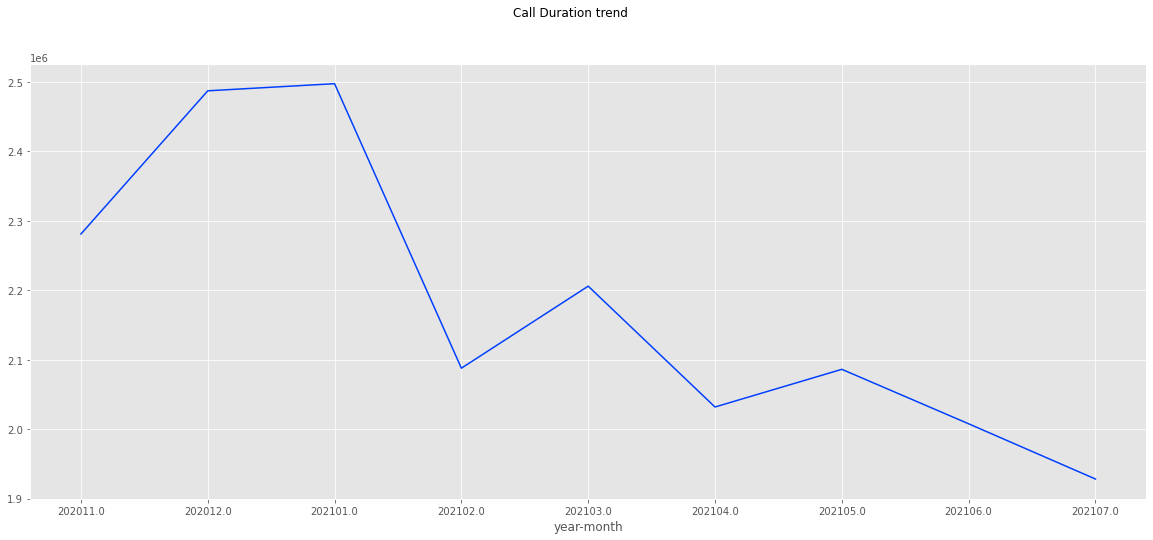

In [11]:
plt.figure(figsize=(20,8))
voice_usage_for_plot.groupby("year-month").sum()["duration"].plot()
plt.suptitle("Call Duration trend")

Text(0.5, 0.98, 'Call Counts trend')

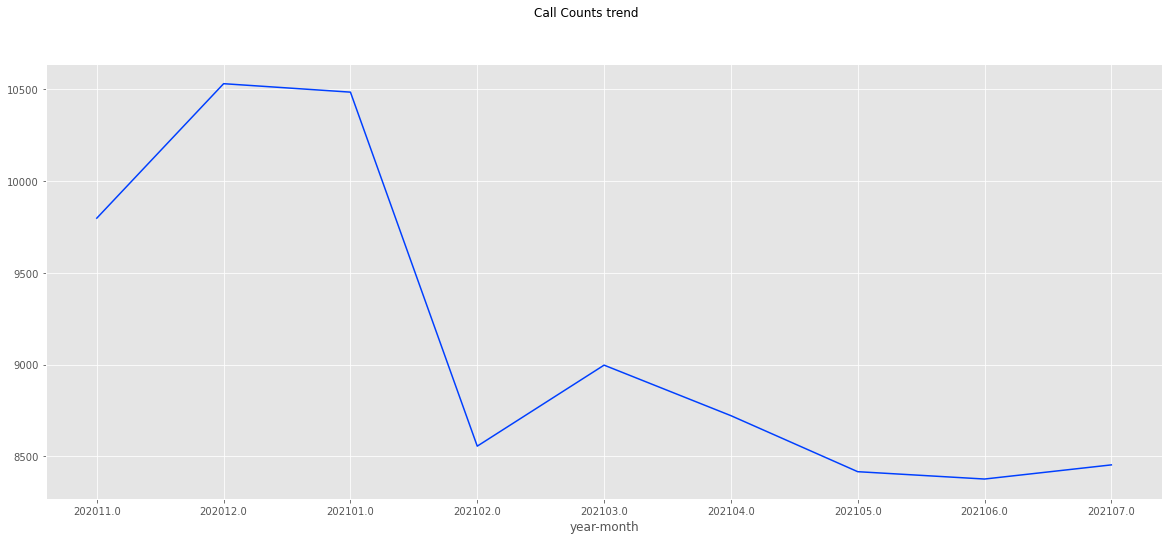

In [12]:
plt.figure(figsize=(20,8))
voice_usage_for_plot.groupby("year-month").sum()["call_count"].plot()
plt.suptitle("Call Counts trend")

In [13]:
pivot_voice_usage_info = pd.pivot_table(voice_usage,index=['event_source.hash'],columns=['year-month'], aggfunc=np.sum, fill_value=0)
pivot_voice_usage_info

call_count                             \
year-month                         202011.0 202012.0 202101.0 202102.0   
event_source.hash                                                        
00019f13081654dd08ea43323942d7ce          0        0        0        0   
00037482b9661d1614757baa198642a0          0        2        0        0   
000e745f09fc7f30f31cdc44e19320ad          0        0        0        0   
003e351d8027c9fc708a37d12272fdd2          0        0        0        0   
00426dbcf162b2a58c98966b6e0d4f6f          0        0        0        1   
...                                     ...      ...      ...      ...   
ffaf543ada05414b720875a69355a977          1        3        4        8   
ffb32c537b2f4feccbee9981c67aa854          1        0        0        0   
ffc1e100097987548c31c656b582413f          0        0        0        0   
ffeabdb264607dd60a26dec400961e9b          0        0        0        0   
fffb0e8122aa77f93a0ef854d1295cdd          0        0        0        1   

                                                                               \
year-month                       202103.0 202104.0 202105.0 202106.0 202107.0   
event_source.hash                                                               
00019f13081654dd08ea43323942d7ce        5        0        0        0        6   
00037482b9661d1614757baa198642a0        0        2        2        2        2   
000e745f09fc7f30f31cdc44e19320ad        0        0        0        0        1   
003e351d8027c9fc708a37d12272fdd2        0        0        0        0        1   
00426dbcf162b2a58c98966b6e0d4f6f        0        0        0        0        0   
...                                   ...      ...      ...      ...      ...   
ffaf543ada05414b720875a69355a977        4        1        1        1        6   
ffb32c537b2f4feccbee9981c67aa854        0        0        0        0        0   
ffc1e100097987548c31c656b582413f        0        2        0        0        1   
ffeabdb264607dd60a26dec400961e9b        0        0        0        0        1   
fffb0e8122aa77f93a0ef854d1295cdd        0        0        0        0        0   

                                 duration                                      \
year-month                       202011.0 202012.0 202101.0 202102.0 202103.0   
event_source.hash                                                               
00019f13081654dd08ea43323942d7ce        0        0        0        0      492   
00037482b9661d1614757baa198642a0        0       41        0        0        0   
000e745f09fc7f30f31cdc44e19320ad        0        0        0        0        0   
003e351d8027c9fc708a37d12272fdd2        0        0        0        0        0   
00426dbcf162b2a58c98966b6e0d4f6f        0        0        0       19        0   
...                                   ...      ...      ...      ...      ...   
ffaf543ada05414b720875a69355a977      159      264      363      745      436   
ffb32c537b2f4feccbee9981c67aa854      131        0        0        0        0   
ffc1e100097987548c31c656b582413f        0        0        0        0        0   
ffeabdb264607dd60a26dec400961e9b        0        0        0        0        0   
fffb0e8122aa77f93a0ef854d1295cdd        0        0        0      115        0   

                                                                      
year-month                       202104.0 202105.0 202106.0 202107.0  
event_source.hash                                                     
00019f13081654dd08ea43323942d7ce        0        0        0     1888  
00037482b9661d1614757baa198642a0       25      284       50       33  
000e745f09fc7f30f31cdc44e19320ad        0        0        0       38  
003e351d8027c9fc708a37d12272fdd2        0        0        0       17  
00426dbcf162b2a58c98966b6e0d4f6f        0        0        0        0  
...                                   ...      ...      ...      ...  
ffaf543ada05414b720875a69355a977      128      118      196      393  
ffb32c537b2f4fec

In [14]:
voice_usage.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,call_count,duration
count,21651.00000,21651.00000
mean,3.80269,905.83105
std,7.86932,2475.21841
min,1.00000,1.00000
25%,1.00000,47.00000
50%,2.00000,224.00000
75%,4.00000,793.00000
max,256.00000,59869.00000


In [15]:
# Freedman-Diaconis’s Rule for binnig
hist_values = np.histogram_bin_edges(voice_usage["call_count"].values,bins="fd")
hist_values

array([  1.        ,   1.21518987,   1.43037975, ..., 255.56962025,
       255.78481013, 256.        ])

In [16]:
# binning call_count
count_bins = [0,3,5,100,256]
for col in pivot_voice_usage_info['call_count'].columns:
    pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)
pivot_voice_usage_info['call_count']

<ipython-input-16-760d1e44a97e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['call_count'][col] = np.searchsorted(count_bins, pivot_voice_usage_info['call_count'][col].values)


year-month,202011.0,202012.0,202101.0,202102.0,202103.0,202104.0,202105.0,202106.0,202107.0
event_source.hash,,,,,,,,,
00019f13081654dd08ea43323942d7ce,0,0,0,0,2,0,0,0,3
00037482b9661d1614757baa198642a0,0,1,0,0,0,1,1,1,1
000e745f09fc7f30f31cdc44e19320ad,0,0,0,0,0,0,0,0,1
003e351d8027c9fc708a37d12272fdd2,0,0,0,0,0,0,0,0,1
00426dbcf162b2a58c98966b6e0d4f6f,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
ffaf543ada05414b720875a69355a977,1,1,2,3,2,1,1,1,3
ffb32c537b2f4feccbee9981c67aa854,1,0,0,0,0,0,0,0,0
ffc1e100097987548c31c656b582413f,0,0,0,0,0,1,0,0,1


In [17]:
# binning duration
duration_bins = [0, 240, 800, 1600,59869]
for col in pivot_voice_usage_info['duration'].columns:
    pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)
pivot_voice_usage_info['duration']

<ipython-input-17-8ae6a56561b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_voice_usage_info['duration'][col] = np.searchsorted(duration_bins, pivot_voice_usage_info['duration'][col].values)


year-month,202011.0,202012.0,202101.0,202102.0,202103.0,202104.0,202105.0,202106.0,202107.0
event_source.hash,,,,,,,,,
00019f13081654dd08ea43323942d7ce,0,0,0,0,2,0,0,0,4
00037482b9661d1614757baa198642a0,0,1,0,0,0,1,2,1,1
000e745f09fc7f30f31cdc44e19320ad,0,0,0,0,0,0,0,0,1
003e351d8027c9fc708a37d12272fdd2,0,0,0,0,0,0,0,0,1
00426dbcf162b2a58c98966b6e0d4f6f,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
ffaf543ada05414b720875a69355a977,1,2,2,2,2,1,1,1,2
ffb32c537b2f4feccbee9981c67aa854,1,0,0,0,0,0,0,0,0
ffc1e100097987548c31c656b582413f,0,0,0,0,0,1,0,0,1


In [18]:
year_month_list = pivot_voice_usage_info['call_count'].columns

In [19]:
# multplying bins to get usage rating
for col in year_month_list:
    pivot_voice_usage_info[col] = pivot_voice_usage_info['call_count'][col]  * pivot_voice_usage_info['duration'][col]

### Justification
- 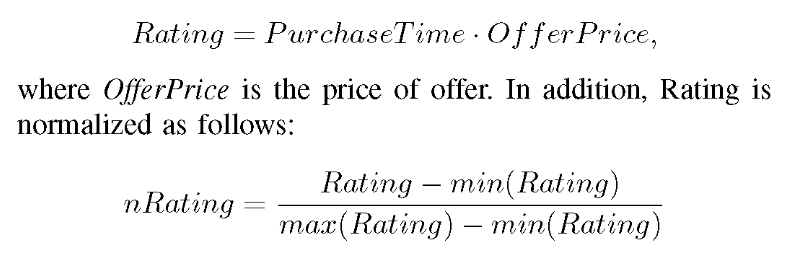
https://doi.org/10.1109/ICCE48956.2021.9352111, 2021  (Pham, C. D., Anh Chu, T., Pham, H. H., Linh Dao, M., Pham, T. S., Hung Trinh, V., & Nguyen, D. H. A recommendation system for offers in telecommunications)
- http://www.utstat.toronto.edu/~brunner/DataAnalysisText/Interactions.pdf

### More advanced methods
- Dimension reduction approaches?

### Usage ratings for year-month

In [20]:
pivot_voice_usage_info = pivot_voice_usage_info.drop(['call_count','duration'], axis=1)
pivot_voice_usage_info

,202011.0,202012.0,202101.0,202102.0,202103.0,202104.0,202105.0,202106.0,202107.0
year-month,,,,,,,,,
event_source.hash,,,,,,,,,
00019f13081654dd08ea43323942d7ce,0,0,0,0,4,0,0,0,12
00037482b9661d1614757baa198642a0,0,1,0,0,0,1,2,1,1
000e745f09fc7f30f31cdc44e19320ad,0,0,0,0,0,0,0,0,1
003e351d8027c9fc708a37d12272fdd2,0,0,0,0,0,0,0,0,1
00426dbcf162b2a58c98966b6e0d4f6f,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
ffaf543ada05414b720875a69355a977,1,2,4,6,4,1,1,1,6
ffb32c537b2f4feccbee9981c67aa854,1,0,0,0,0,0,0,0,0


In [21]:
pivot_voice_usage_info.T.reset_index(drop=True).T
pivot_voice_usage_info.columns=year_month_list

In [22]:
# scaling usage rating
scaler = MinMaxScaler()
for col in year_month_list:
    pivot_voice_usage_info[col] = scaler.fit_transform(pivot_voice_usage_info[col].values.reshape(-1,1))

<AxesSubplot:xlabel='year-month', ylabel='event_source.hash'>

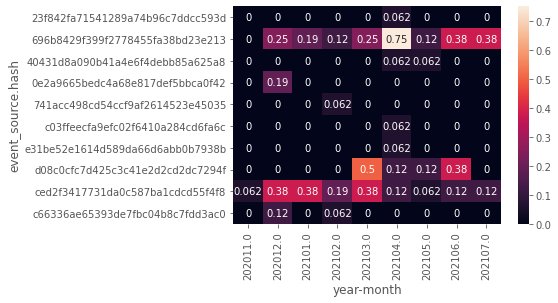

In [23]:
sns.heatmap(pivot_voice_usage_info[year_month_list].sample(n=10), annot=True)

In [24]:
# handeling cal index
pivot_voice_usage_info.columns = pd.Index(list(pivot_voice_usage_info.columns))

In [25]:
pivot_voice_usage_info['Usage_Rating_Scaled'] = pivot_voice_usage_info[year_month_list].sum(axis=1)/len(year_month_list)
pivot_voice_usage_info

,202011.0,202012.0,202101.0,202102.0,202103.0,202104.0,202105.0,202106.0,202107.0,Usage_Rating_Scaled
event_source.hash,,,,,,,,,,
00019f13081654dd08ea43323942d7ce,0.0000,0.0000,0.00,0.0000,0.25,0.0000,0.0000,0.0000,0.7500,0.111111
00037482b9661d1614757baa198642a0,0.0000,0.0625,0.00,0.0000,0.00,0.0625,0.1250,0.0625,0.0625,0.041667
000e745f09fc7f30f31cdc44e19320ad,0.0000,0.0000,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0625,0.006944
003e351d8027c9fc708a37d12272fdd2,0.0000,0.0000,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0625,0.006944
00426dbcf162b2a58c98966b6e0d4f6f,0.0000,0.0000,0.00,0.0625,0.00,0.0000,0.0000,0.0000,0.0000,0.006944
...,...,...,...,...,...,...,...,...,...,...
ffaf543ada05414b720875a69355a977,0.0625,0.1250,0.25,0.3750,0.25,0.0625,0.0625,0.0625,0.3750,0.180556
ffb32c537b2f4feccbee9981c67aa854,0.0625,0.0000,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.006944
ffc1e100097987548c31c656b582413f,0.0000,0.0000,0.00,0.0000,0.00,0.0625,0.0000,0.0000,0.0625,0.013889


### Finding Outliers

<AxesSubplot:>

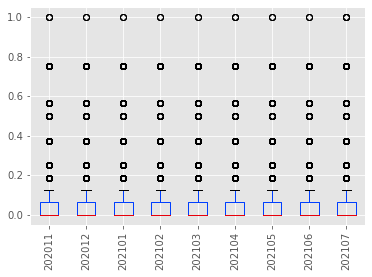

In [26]:
pivot_voice_usage_info.boxplot(column=[int(x) for x in year_month_list], rot=90)

<AxesSubplot:>

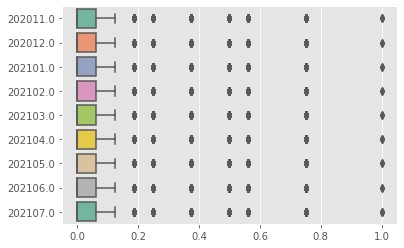

In [27]:
ax = sns.boxplot(data=pivot_voice_usage_info[[int(x) for x in year_month_list]], orient="h", palette="Set2")
ax

<AxesSubplot:ylabel='Density'>

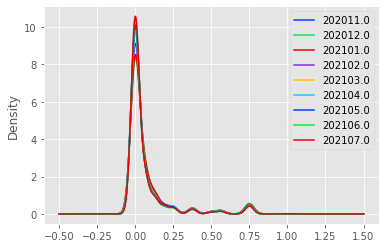

In [28]:
pivot_voice_usage_info[[int(x) for x in year_month_list]].plot(kind = 'density')

## Three quantitative methods commonly used in statistics for the detection of univariate outliers:
- Tukey’s box plot method
- Internally studentized residuals (AKA z-score method)
- Median Absolute Deviation method

### 1) Tukey’s box plot method
- Tukey distinguishes between possible and probable outliers. A possible outlier is located between the inner and the outer fence, whereas a probable outlier is located outside the outer fence.    
    
- IQR =Q3 - Q1, whereas q3 := 75th quartile and q1 := 25th quartile
- Inner fence = [Q1-1.5*IQR, Q3+1.5*IQR]
- Outer fence = [Q1–3*IQR, Q3+3*IQR]

In [29]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    outliers_prob_indexes = []
    outliers_poss_indexes = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob_indexes.append(index)
            outliers_prob.append(x)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss_indexes.append(index)
            outliers_poss.append(x)
    # returns indexes of the rows with outliers
    return outliers_prob, outliers_prob_indexes, outliers_poss, outliers_poss_indexes

In [30]:
pr_col_threshold = []
po_col_threshold = []
for col in year_month_list:
    pr_col, pr_col_indexes, po_col, po_col_indexes = tukeys_method(pivot_voice_usage_info, int(col))
    pr_col_threshold.append({col: {"threshold": min(pr_col), "count": len(pr_col)}})
    po_col_threshold.append({col: {"threshold": min(po_col), "count": len(po_col)}})
    print()
    print(f"Probable Outliers for {col}---->\n", pr_col)
    print(len(pr_col))
    print()
    print(f"Possible Outliers for {col}----->\n", po_col)
    print(len(po_col))
    print()


Probable Outliers for 202011.0---->
 [0.5625, 0.375, 0.75, 0.25, 0.375, 0.25, 0.25, 0.375, 0.75, 0.75, 0.375, 0.5625, 0.25, 0.375, 0.25, 0.75, 0.5, 0.375, 0.75, 0.75, 0.25, 0.25, 0.375, 0.75, 0.75, 0.375, 0.75, 0.25, 0.25, 0.25, 0.375, 0.5, 0.5, 1.0, 0.375, 0.5625, 0.375, 0.5625, 0.75, 0.25, 0.75, 0.5625, 0.25, 0.75, 0.75, 0.75, 0.5625, 0.5625, 0.25, 0.25, 0.75, 0.25, 0.75, 0.375, 0.25, 0.75, 0.75, 0.5, 0.75, 0.375, 0.375, 0.25, 0.75, 0.375, 0.75, 0.25, 0.25, 0.5625, 0.75, 0.75, 0.75, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.75, 0.5625, 0.75, 0.25, 0.75, 0.5, 0.5625, 0.25, 0.375, 0.5625, 0.75, 0.75, 0.5625, 0.25, 0.375, 0.75, 0.75, 0.25, 0.75, 0.75, 0.25, 0.75, 0.75, 0.75, 0.5625, 0.375, 0.25, 0.25, 0.25, 0.75, 0.75, 0.375, 0.25, 0.75, 0.75, 0.25, 0.25, 0.75, 0.75, 0.375, 0.375, 0.25, 0.75, 0.75, 0.5625, 1.0, 0.5, 1.0, 0.5, 0.5625, 0.5625, 0.5625, 0.5625, 0.75, 0.5, 0.75, 0.5625, 0.375, 0.25, 0.75, 0.5625, 0.75, 0.75, 0.375, 0.75, 0.375, 0.25, 0.5625, 0.5625, 0.25, 0.75, 0.25, 0.5, 

In [31]:
pr_col_threshold

[{202011.0: {'threshold': 0.25, 'count': 638}},
 {202012.0: {'threshold': 0.25, 'count': 693}},
 {202101.0: {'threshold': 0.25, 'count': 694}},
 {202102.0: {'threshold': 0.25, 'count': 571}},
 {202103.0: {'threshold': 0.25, 'count': 589}},
 {202104.0: {'threshold': 0.25, 'count': 616}},
 {202105.0: {'threshold': 0.25, 'count': 551}},
 {202106.0: {'threshold': 0.25, 'count': 514}},
 {202107.0: {'threshold': 0.25, 'count': 520}}]

In [32]:
po_col_threshold

[{202011.0: {'threshold': 0.1875, 'count': 819}},
 {202012.0: {'threshold': 0.1875, 'count': 882}},
 {202101.0: {'threshold': 0.1875, 'count': 875}},
 {202102.0: {'threshold': 0.1875, 'count': 716}},
 {202103.0: {'threshold': 0.1875, 'count': 763}},
 {202104.0: {'threshold': 0.1875, 'count': 763}},
 {202105.0: {'threshold': 0.1875, 'count': 734}},
 {202106.0: {'threshold': 0.1875, 'count': 665}},
 {202107.0: {'threshold': 0.1875, 'count': 687}}]

### 2) Median Absolute Deviation method
- this method is highly limited as the distributions mean and standard deviation are sensitive to outliers. This means that finding one outlier is dependent on other outliers as every observation directly affects the mean.    
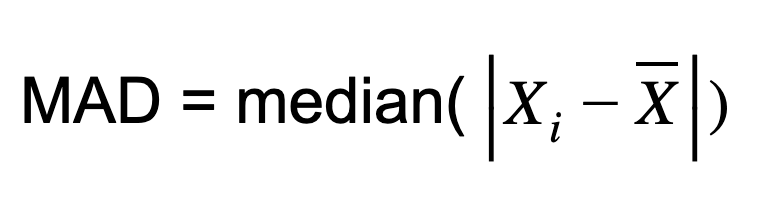

In [33]:
from scipy import stats

# MAD method
def mad_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_absolute_deviation(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:,variable_name]):
        t = (v-med[index])/mad[index]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

In [34]:
col_threshold = []
for col in year_month_list:
    outliers = mad_method(pivot_voice_usage_info, int(col))
    outlier_cols = pivot_voice_usage_info[int(col)].iloc[outliers]
    col_threshold.append({col: {"threshold" :min(outlier_cols), "count":len(outliers)}})
    print()
    print(f"Outliers for {col}---->\n", outlier_cols)
    print(len(outliers))

<ipython-input-33-ab658f4f8d27>:8: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  mad = np.abs(stats.median_absolute_deviation(df))
<ipython-input-33-ab658f4f8d27>:16: RuntimeWarning: invalid value encountered in double_scalars
  t = (v-med[index])/mad[index]
<ipython-input-33-ab658f4f8d27>:16: RuntimeWarning: divide by zero encountered in double_scalars
  t = (v-med[index])/mad[index]



Outliers for 202011.0---->
 event_source.hash
0097a2d8eada58eb8bf40ff54074b7c1    0.0625
00d133ae4f2e17369e248d7ffcafe849    0.1250
0108704b779801c84fc2271c0144be12    0.1250
014ec0c7072ec77877b6e1a58e1b770f    0.1250
01744c6f85fa6e293b2788222b747fdd    0.0625
                                     ...  
ff69f1155d6a6c46de771fc543d223c4    0.0625
ff6bb737b3dca3e708c0c7ad6579b11f    0.1250
ffa20a6779fa903ef65c8a88eefe6bcd    0.5000
ffaf543ada05414b720875a69355a977    0.0625
ffb32c537b2f4feccbee9981c67aa854    0.0625
Name: 202011.0, Length: 2112, dtype: float64
2112

Outliers for 202012.0---->
 event_source.hash
00037482b9661d1614757baa198642a0    0.0625
004a30a9ab9114196cffa568c73603b6    0.0625
0097a2d8eada58eb8bf40ff54074b7c1    0.1250
00d7f865eb3ec003986a1c8a420458cc    0.0625
00f894be45cf878a3283d463fa3b5092    0.3750
                                     ...  
ff580a529eaf9893275563a570965d32    0.3750
ff69f1155d6a6c46de771fc543d223c4    0.3750
ff7a6a0e56d9aa754fafe9f7053f4a83    0.3

In [35]:
col_threshold

[{202011.0: {'threshold': 0.0625, 'count': 2112}},
 {202012.0: {'threshold': 0.0625, 'count': 2276}},
 {202101.0: {'threshold': 0.0625, 'count': 2283}},
 {202102.0: {'threshold': 0.0625, 'count': 1897}},
 {202103.0: {'threshold': 0.0625, 'count': 1969}},
 {202104.0: {'threshold': 0.0625, 'count': 1940}},
 {202105.0: {'threshold': 0.0625, 'count': 1912}},
 {202106.0: {'threshold': 0.0625, 'count': 1855}},
 {202107.0: {'threshold': 0.0625, 'count': 1850}}]

In [36]:
sum_outlier = 0
for col in col_threshold:
    for key,val in col.items():
        sum_outlier += val["threshold"]
avg_outlier = sum_outlier / len(col_threshold)
pivot_voice_usage_info["Outlier"]=pivot_voice_usage_info.apply(lambda x : "YES" if x["Usage_Rating_Scaled"]> avg_outlier else "NO", axis=1)
print(avg_outlier)

0.0625


In [37]:
pivot_voice_usage_info

,202011.0,202012.0,202101.0,202102.0,202103.0,202104.0,202105.0,202106.0,202107.0,Usage_Rating_Scaled,Outlier
event_source.hash,,,,,,,,,,,
00019f13081654dd08ea43323942d7ce,0.0000,0.0000,0.00,0.0000,0.25,0.0000,0.0000,0.0000,0.7500,0.111111,YES
00037482b9661d1614757baa198642a0,0.0000,0.0625,0.00,0.0000,0.00,0.0625,0.1250,0.0625,0.0625,0.041667,NO
000e745f09fc7f30f31cdc44e19320ad,0.0000,0.0000,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0625,0.006944,NO
003e351d8027c9fc708a37d12272fdd2,0.0000,0.0000,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0625,0.006944,NO
00426dbcf162b2a58c98966b6e0d4f6f,0.0000,0.0000,0.00,0.0625,0.00,0.0000,0.0000,0.0000,0.0000,0.006944,NO
...,...,...,...,...,...,...,...,...,...,...,...
ffaf543ada05414b720875a69355a977,0.0625,0.1250,0.25,0.3750,0.25,0.0625,0.0625,0.0625,0.3750,0.180556,YES
ffb32c537b2f4feccbee9981c67aa854,0.0625,0.0000,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.006944,NO
ffc1e100097987548c31c656b582413f,0.0000,0.0000,0.00,0.0000,0.00,0.0625,0.0000,0.0000,0.0625,0.013889,NO


In [38]:
# labling usage bins
bins = [0, 0.33, 0.66,1]
labels = ['LOW','MEDIUM','HIGH']
pivot_voice_usage_info['Usage_Rating_Categorical'] = pd.cut(pivot_voice_usage_info['Usage_Rating_Scaled'], bins=bins, labels=labels)
pivot_voice_usage_info

,202011.0,202012.0,202101.0,202102.0,202103.0,202104.0,202105.0,202106.0,202107.0,Usage_Rating_Scaled,Outlier,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,
00019f13081654dd08ea43323942d7ce,0.0000,0.0000,0.00,0.0000,0.25,0.0000,0.0000,0.0000,0.7500,0.111111,YES,LOW
00037482b9661d1614757baa198642a0,0.0000,0.0625,0.00,0.0000,0.00,0.0625,0.1250,0.0625,0.0625,0.041667,NO,LOW
000e745f09fc7f30f31cdc44e19320ad,0.0000,0.0000,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0625,0.006944,NO,LOW
003e351d8027c9fc708a37d12272fdd2,0.0000,0.0000,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0625,0.006944,NO,LOW
00426dbcf162b2a58c98966b6e0d4f6f,0.0000,0.0000,0.00,0.0625,0.00,0.0000,0.0000,0.0000,0.0000,0.006944,NO,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...
ffaf543ada05414b720875a69355a977,0.0625,0.1250,0.25,0.3750,0.25,0.0625,0.0625,0.0625,0.3750,0.180556,YES,LOW
ffb32c537b2f4feccbee9981c67aa854,0.0625,0.0000,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.006944,NO,LOW
ffc1e100097987548c31c656b582413f,0.0000,0.0000,0.00,0.0000,0.00,0.0625,0.0000,0.0000,0.0625,0.013889,NO,LOW


In [39]:
# adding category "NO" 
pivot_voice_usage_info['Usage_Rating_Categorical'] = pivot_voice_usage_info['Usage_Rating_Categorical'].cat.add_categories("NO")
pivot_voice_usage_info.loc[pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0, 'Usage_Rating_Categorical'] = "NO"
pivot_voice_usage_info[(pivot_voice_usage_info['Usage_Rating_Scaled'] == 0.0)]

,202011.0,202012.0,202101.0,202102.0,202103.0,202104.0,202105.0,202106.0,202107.0,Usage_Rating_Scaled,Outlier,Usage_Rating_Categorical
event_source.hash,,,,,,,,,,,,


## Combining other features

In [41]:
combined_df = voice_usage[["event_source.hash","outgoing_country"]]

In [42]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21651 entries, 0 to 21650
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_source.hash  21651 non-null  object
 1   outgoing_country   21651 non-null  object
dtypes: object(2)
memory usage: 338.4+ KB


In [43]:
combined_df = combined_df.groupby('event_source.hash', as_index=False).agg(list)

In [44]:
combined_df["outgoing_country"] = combined_df["outgoing_country"].apply(lambda x:  list(set(x)))

In [45]:
combined_df

,event_source.hash,outgoing_country
0,00019f13081654dd08ea43323942d7ce,[Australia - Mobile]
1,00037482b9661d1614757baa198642a0,[U.S.A]
2,000e745f09fc7f30f31cdc44e19320ad,[Canada]
3,003e351d8027c9fc708a37d12272fdd2,[Russia]
4,00426dbcf162b2a58c98966b6e0d4f6f,[France]
...,...,...
6136,ffaf543ada05414b720875a69355a977,[Singapore]
6137,ffb32c537b2f4feccbee9981c67aa854,[Germany]
6138,ffc1e100097987548c31c656b582413f,[Australia - Mobile]
6139,ffeabdb264607dd60a26dec400961e9b,[Kuwait -Mobile]


In [46]:
combined_df.to_csv("data/user_profile/VOICE_IDD_Outgoing_Country.csv")

In [47]:
pivot_voice_usage_info_combined = pivot_voice_usage_info.merge(combined_df, how="left",on="event_source.hash")

In [48]:
pivot_voice_usage_info_combined

,event_source.hash,202011.0,202012.0,202101.0,202102.0,202103.0,202104.0,202105.0,202106.0,202107.0,Usage_Rating_Scaled,Outlier,Usage_Rating_Categorical,outgoing_country
0,00019f13081654dd08ea43323942d7ce,0.0000,0.0000,0.00,0.0000,0.25,0.0000,0.0000,0.0000,0.7500,0.111111,YES,LOW,[Australia - Mobile]
1,00037482b9661d1614757baa198642a0,0.0000,0.0625,0.00,0.0000,0.00,0.0625,0.1250,0.0625,0.0625,0.041667,NO,LOW,[U.S.A]
2,000e745f09fc7f30f31cdc44e19320ad,0.0000,0.0000,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0625,0.006944,NO,LOW,[Canada]
3,003e351d8027c9fc708a37d12272fdd2,0.0000,0.0000,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0625,0.006944,NO,LOW,[Russia]
4,00426dbcf162b2a58c98966b6e0d4f6f,0.0000,0.0000,0.00,0.0625,0.00,0.0000,0.0000,0.0000,0.0000,0.006944,NO,LOW,[France]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6136,ffaf543ada05414b720875a69355a977,0.0625,0.1250,0.25,0.3750,0.25,0.0625,0.0625,0.0625,0.3750,0.180556,YES,LOW,[Singapore]
6137,ffb32c537b2f4feccbee9981c67aa854,0.0625,0.0000,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.006944,NO,LOW,[Germany]
6138,ffc1e100097987548c31c656b582413f,0.0000,0.0000,0.00,0.0000,0.00,0.0625,0.0000,0.0000,0.0625,0.013889,NO,LOW,[Australia - Mobile]
6139,ffeabdb264607dd60a26dec400961e9b,0.0000,0.0000,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0625,0.006944,NO,LOW,[Kuwait -Mobile]


### No of outliers

In [49]:
pivot_voice_usage_info_combined["Outlier"].value_counts()

NO     4613
YES    1528
Name: Outlier, dtype: int64

In [50]:
pivot_voice_usage_info_combined.to_csv("data/user_profile/VOICE_IDD_Outgoing_Usage_Categorical.csv")